## Importing the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth

In [ ]:
from oauth2client.client import GoogleCredentials

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#https://drive.google.com/file/d/1A4GmC86dRd4QFEl2nG6hFarXjFwAMYJF/view?usp=sharing

fileDownloaded = drive.CreateFile({"id":"1A4GmC86dRd4QFEl2nG6hFarXjFwAMYJF"})

In [ ]:
fileDownloaded.GetContentFile("cleaned_data.csv")

In [ ]:
import pandas as pd
df = pd.read_csv("cleaned_data.csv", encoding='utf-8')
df.head()

,Unnamed: 0,Person Sequence Number - Person 1,city,state,zip,zip_plus4,Number of Children (Enhanced),Advantage Target Income 3.0,Discretionary Spending Income,Target Net Worth 4.0 Code,NICHES 5.0 Code,Family composition (Enhanced),Advantage Individual Marital Status - Person 1,Gender code - Person 1,Advantage Dwelling Type,Advantage Home Owner,Advantage Length of Residence,Family composition dummies,Marital Status dummies,Gender dummies,Dwelling Type dummies,Home Owner dummies,Length of Residence dummies,sum_overall,sum_automotive,sum_communicatoin,sum_education,sum_financial_services,sum_food_convenience_drug_store,sum_other_retail,sum_restaurant,sum_retail,sum_services,sum_travel,sum_communication,sum_entertainment
0,0,3300572A0311940000A51A,ALEXANDRIA,VA,22314,1747,2.0,7.0,4.0,7.0,14.0,6.0,0.0,1.0,5.0,4.0,8.0,"Male householder with one or more persons, wit...",Single,Male,Condo,Definite owner,20+ years,19100.0,965.0,2525.5,0.0,0.0,3476.0,1438.0,664.5,6067.5,25.5,601.0,2525.5,5200.5
1,1,3300572A0311FA019775B8,ALEXANDRIA,VA,22314,1768,2.0,12.0,10.0,10.0,9.0,12.0,0.0,1.0,1.0,4.0,5.0,"One person, male householder, with no children",Single,Male,SFDU,Definite owner,6-10 years,29625.0,855.5,3130.0,0.0,0.0,6250.0,5255.0,4555.0,9550.0,163.0,3813.0,3130.0,776.5
2,2,330055F3030E0C000B3592,ALEXANDRIA,VA,22314,1771,3.0,13.0,9.0,11.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,"Married, husband and wife present, with no chi...",Married,Female,Condo,Definite owner,3-5 years,10475.0,0.0,0.0,0.0,0.0,25.5,726.0,1064.0,8342.5,327.5,0.0,0.0,0.0
3,3,3300572A0310CF0001DD4F,ALEXANDRIA,VA,22314,1771,1.0,13.0,12.0,9.0,4.0,2.0,1.0,2.0,5.0,4.0,5.0,"Married, husband and wife present, with no chi...",Married,Female,Condo,Definite owner,6-10 years,30000.0,3162.5,1450.0,0.0,525.0,6500.0,14325.0,3592.5,18600.0,926.5,6663.0,1450.0,628.0
4,4,3300571D0310C7000083BD,ALEXANDRIA,VA,22314,1792,1.0,6.0,4.0,3.0,10.0,12.0,0.0,1.0,5.0,4.0,5.0,"One person, male householder, with no children",Single,Male,Condo,Definite owner,6-10 years,29875.0,563.5,3737.5,0.0,1001.0,7600.0,9550.0,1762.5,10655.0,2426.5,5950.5,3737.5,1175.0


In [ ]:
column = ["Unnamed: 0","Person Sequence Number - Person 1","city","state","Family composition dummies","Marital Status dummies","Gender dummies","Dwelling Type dummies","Home Owner dummies","Length of Residence dummies"]
df1 = df.drop(columns = column)
df1



,zip,zip_plus4,Number of Children (Enhanced),Advantage Target Income 3.0,Discretionary Spending Income,Target Net Worth 4.0 Code,NICHES 5.0 Code,Family composition (Enhanced),Advantage Individual Marital Status - Person 1,Gender code - Person 1,Advantage Dwelling Type,Advantage Home Owner,Advantage Length of Residence,sum_overall,sum_automotive,sum_communicatoin,sum_education,sum_financial_services,sum_food_convenience_drug_store,sum_other_retail,sum_restaurant,sum_retail,sum_services,sum_travel,sum_communication,sum_entertainment
0,22314,1747,2.0,7.0,4.0,7.0,14.0,6.0,0.0,1.0,5.0,4.0,8.0,19100.0,965.0,2525.5,0.0,0.0,3476.0,1438.0,664.5,6067.5,25.5,601.0,2525.5,5200.5
1,22314,1768,2.0,12.0,10.0,10.0,9.0,12.0,0.0,1.0,1.0,4.0,5.0,29625.0,855.5,3130.0,0.0,0.0,6250.0,5255.0,4555.0,9550.0,163.0,3813.0,3130.0,776.5
2,22314,1771,3.0,13.0,9.0,11.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,10475.0,0.0,0.0,0.0,0.0,25.5,726.0,1064.0,8342.5,327.5,0.0,0.0,0.0
3,22314,1771,1.0,13.0,12.0,9.0,4.0,2.0,1.0,2.0,5.0,4.0,5.0,30000.0,3162.5,1450.0,0.0,525.0,6500.0,14325.0,3592.5,18600.0,926.5,6663.0,1450.0,628.0
4,22314,1792,1.0,6.0,4.0,3.0,10.0,12.0,0.0,1.0,5.0,4.0,5.0,29875.0,563.5,3737.5,0.0,1001.0,7600.0,9550.0,1762.5,10655.0,2426.5,5950.5,3737.5,1175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150931,20815,7284,2.0,13.0,10.0,11.0,9.0,14.0,1.0,2.0,5.0,4.0,7.0,28375.0,877.0,2288.0,0.0,0.0,11805.0,3900.0,1263.0,6368.0,214.5,6300.0,2288.0,413.0
150932,20815,7290,1.0,6.0,5.0,5.0,14.0,14.0,0.0,2.0,5.0,4.0,2.0,20875.0,326.5,726.5,0.0,2425.0,3787.5,4517.5,1363.0,7800.0,127.5,102.0,726.5,1037.5
150933,20816,1013,1.0,13.0,12.0,10.0,5.0,1.0,1.0,1.0,1.0,4.0,7.0,30000.0,15250.0,10100.0,0.0,4875.0,24250.0,29375.0,5005.0,29375.0,3855.5,28875.0,10100.0,9287.5
150934,20816,1030,2.0,13.0,12.0,8.0,2.0,2.0,1.0,2.0,1.0,4.0,5.0,28375.0,76.5,2180.0,0.0,25.5,5413.5,10800.0,1337.5,11500.0,1152.0,15837.5,2180.0,51.0


## K-means clustering


In [ ]:

from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

within_cluster_variance = [] # initiate empty list with no data

# build models for range of ks from 2 to 20
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')

plt.title('Elbow curve')  #Choose k at elbow of plot as a general rule.  We want a small enough number of categories to 
                          # such that we can still learn something meaningful from them via exploration of our variables.

ModuleNotFoundError: ignored

Hence, the optimal K value is found to be 5 using the elbow method.

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df1)
df1["label"] = clusters

'''
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
#Advantage Target Income 3.0,Advantage Dwelling Type,sum_automotive

ax.scatter(df["Advantage Target Income 3.0"][df.label == 0], df["sum_overall"][df.label == 0], df["sum_automotive"][df.label == 0], c='blue', s=60)
ax.scatter(df["Advantage Target Income 3.0"][df.label == 1], df["sum_overall"][df.label == 1], df["sum_automotive"][df.label == 1], c='red', s=60)
ax.scatter(df["Advantage Target Income 3.0"][df.label == 2], df["sum_overall"][df.label == 2], df["sum_automotive"][df.label == 2], c='green', s=60)
ax.scatter(df["Advantage Target Income 3.0"][df.label == 3], df["sum_overall"][df.label == 3], df["sum_automotive"][df.label == 3], c='orange', s=60)
ax.scatter(df["Advantage Target Income 3.0"][df.label == 4], df["sum_overall"][df.label == 4], df["sum_automotive"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Target Income")
plt.ylabel("sum_overall")
ax.set_zlabel('sum_automotive')
plt.show()
'''


'\nfrom mpl_toolkits.mplot3d import Axes3D\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport pandas as pd\n \nfig = plt.figure(figsize=(20,10))\nax = fig.add_subplot(111, projection=\'3d\')\n#Advantage Target Income 3.0,Advantage Dwelling Type,sum_automotive\n\nax.scatter(df["Advantage Target Income 3.0"][df.label == 0], df["sum_overall"][df.label == 0], df["sum_automotive"][df.label == 0], c=\'blue\', s=60)\nax.scatter(df["Advantage Target Income 3.0"][df.label == 1], df["sum_overall"][df.label == 1], df["sum_automotive"][df.label == 1], c=\'red\', s=60)\nax.scatter(df["Advantage Target Income 3.0"][df.label == 2], df["sum_overall"][df.label == 2], df["sum_automotive"][df.label == 2], c=\'green\', s=60)\nax.scatter(df["Advantage Target Income 3.0"][df.label == 3], df["sum_overall"][df.label == 3], df["sum_automotive"][df.label == 3], c=\'orange\', s=60)\nax.scatter(df["Advantage Target Income 3.0"][df.label == 4], df["sum_overall"][df.label == 4], df["sum_automotive"][df.la

In [ ]:
df["label"] = df1["label"]
df

,Unnamed: 0,Person Sequence Number - Person 1,city,state,zip,zip_plus4,Number of Children (Enhanced),Advantage Target Income 3.0,Discretionary Spending Income,Target Net Worth 4.0 Code,NICHES 5.0 Code,Family composition (Enhanced),Advantage Individual Marital Status - Person 1,Gender code - Person 1,Advantage Dwelling Type,Advantage Home Owner,Advantage Length of Residence,Family composition dummies,Marital Status dummies,Gender dummies,Dwelling Type dummies,Home Owner dummies,Length of Residence dummies,sum_overall,sum_automotive,sum_communicatoin,sum_education,sum_financial_services,sum_food_convenience_drug_store,sum_other_retail,sum_restaurant,sum_retail,sum_services,sum_travel,sum_communication,sum_entertainment,label
0,0,3300572A0311940000A51A,ALEXANDRIA,VA,22314,1747,2.0,7.0,4.0,7.0,14.0,6.0,0.0,1.0,5.0,4.0,8.0,"Male householder with one or more persons, wit...",Single,Male,Condo,Definite owner,20+ years,19100.0,965.0,2525.5,0.0,0.0,3476.0,1438.0,664.5,6067.5,25.5,601.0,2525.5,5200.5,2
1,1,3300572A0311FA019775B8,ALEXANDRIA,VA,22314,1768,2.0,12.0,10.0,10.0,9.0,12.0,0.0,1.0,1.0,4.0,5.0,"One person, male householder, with no children",Single,Male,SFDU,Definite owner,6-10 years,29625.0,855.5,3130.0,0.0,0.0,6250.0,5255.0,4555.0,9550.0,163.0,3813.0,3130.0,776.5,3
2,2,330055F3030E0C000B3592,ALEXANDRIA,VA,22314,1771,3.0,13.0,9.0,11.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,"Married, husband and wife present, with no chi...",Married,Female,Condo,Definite owner,3-5 years,10475.0,0.0,0.0,0.0,0.0,25.5,726.0,1064.0,8342.5,327.5,0.0,0.0,0.0,2
3,3,3300572A0310CF0001DD4F,ALEXANDRIA,VA,22314,1771,1.0,13.0,12.0,9.0,4.0,2.0,1.0,2.0,5.0,4.0,5.0,"Married, husband and wife present, with no chi...",Married,Female,Condo,Definite owner,6-10 years,30000.0,3162.5,1450.0,0.0,525.0,6500.0,14325.0,3592.5,18600.0,926.5,6663.0,1450.0,628.0,1
4,4,3300571D0310C7000083BD,ALEXANDRIA,VA,22314,1792,1.0,6.0,4.0,3.0,10.0,12.0,0.0,1.0,5.0,4.0,5.0,"One person, male householder, with no children",Single,Male,Condo,Definite owner,6-10 years,29875.0,563.5,3737.5,0.0,1001.0,7600.0,9550.0,1762.5,10655.0,2426.5,5950.5,3737.5,1175.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150931,150931,1800514F030E0F00004869,CHEVY CHASE,MD,20815,7284,2.0,13.0,10.0,11.0,9.0,14.0,1.0,2.0,5.0,4.0,7.0,"One person, female householder, with no children",Married,Female,Condo,Definite owner,16-20 years,28375.0,877.0,2288.0,0.0,0.0,11805.0,3900.0,1263.0,6368.0,214.5,6300.0,2288.0,413.0,3
150932,150932,1800514F0315190060D211,CHEVY CHASE,MD,20815,7290,1.0,6.0,5.0,5.0,14.0,14.0,0.0,2.0,5.0,4.0,2.0,"One person, female householder, with no children",Single,Female,Condo,Definite owner,7-12 months,20875.0,326.5,726.5,0.0,2425.0,3787.5,4517.5,1363.0,7800.0,127.5,102.0,726.5,1037.5,2
150933,150933,18005151030E0C0016BE69,BETHESDA,MD,20816,1013,1.0,13.0,12.0,10.0,5.0,1.0,1.0,1.0,1.0,4.0,7.0,"Married, husband and wife present, with children",Married,Male,SFDU,Definite owner,16-20 years,30000.0,15250.0,10100.0,0.0,4875.0,24250.0,29375.0,5005.0,29375.0,3855.5,28875.0,10100.0,9287.5,4
150934,150934,060167CD0311F30127ABF4,BETHESDA,MD,20816,1030,2.0,13.0,12.0,8.0,2.0,2.0,1.0,2.0,1.0,4.0,5.0,"Married, husband and wife present, with no chi...",Married,Female,SFDU,Definite owner,6-10 years,28375.0,76.5,2180.0,0.0,25.5,5413.5,10800.0,1337.5,11500.0,1152.0,15837.5,2180.0,51.0,3


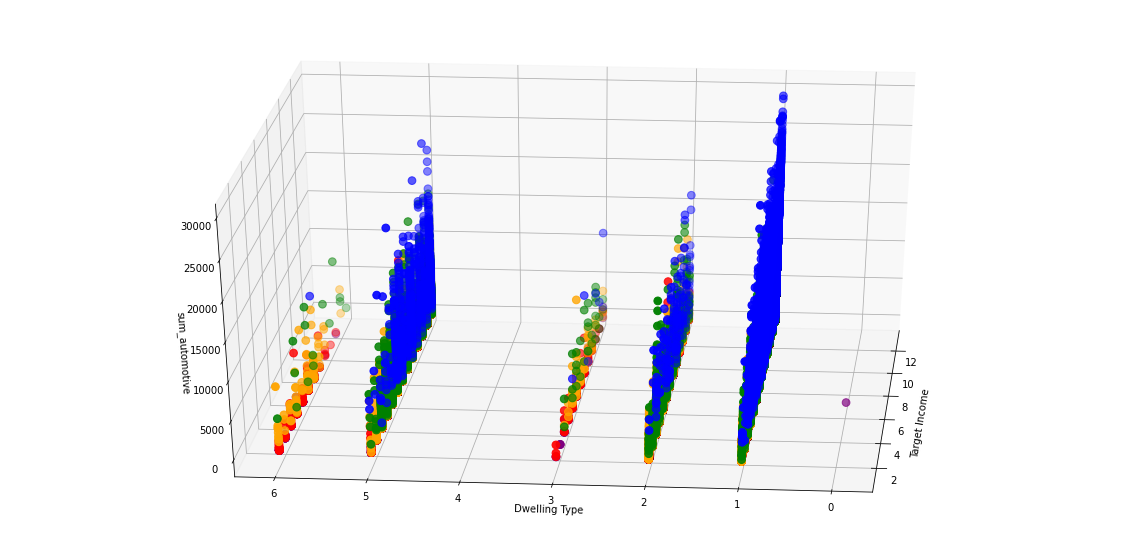

In [ ]:
'''
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
#Advantage Target Income 3.0,Advantage Dwelling Type,sum_automotive

ax.scatter(df["Advantage Target Income 3.0"][df.label == 0], df["Advantage Dwelling Type"][df.label == 0], df["sum_automotive"][df.label == 0], c='blue', s=60)
ax.scatter(df["Advantage Target Income 3.0"][df.label == 1], df["Advantage Dwelling Type"][df.label == 1], df["sum_automotive"][df.label == 1], c='red', s=60)
ax.scatter(df["Advantage Target Income 3.0"][df.label == 2], df["Advantage Dwelling Type"][df.label == 2], df["sum_automotive"][df.label == 2], c='green', s=60)
ax.scatter(df["Advantage Target Income 3.0"][df.label == 3], df["Advantage Dwelling Type"][df.label == 3], df["sum_automotive"][df.label == 3], c='orange', s=60)
ax.scatter(df["Advantage Target Income 3.0"][df.label == 4], df["Advantage Dwelling Type"][df.label == 4], df["sum_automotive"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Target Income")
plt.ylabel("Dwelling Type")
ax.set_zlabel('sum_automotive')
plt.show()
'''

In [ ]:
  df_kmeans = df.groupby('label').mean()
  df_kmeans

,Unnamed: 0,zip,zip_plus4,Number of Children (Enhanced),Advantage Target Income 3.0,Discretionary Spending Income,Target Net Worth 4.0 Code,NICHES 5.0 Code,Family composition (Enhanced),Advantage Individual Marital Status - Person 1,Gender code - Person 1,Advantage Dwelling Type,Advantage Home Owner,Advantage Length of Residence,sum_overall,sum_automotive,sum_communicatoin,sum_education,sum_financial_services,sum_food_convenience_drug_store,sum_other_retail,sum_restaurant,sum_retail,sum_services,sum_travel,sum_communication,sum_entertainment
label,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,64385.807073,22071.967649,4124.674632,1.594123,6.703625,4.164841,4.140995,13.367620,8.785334,0.574026,1.615862,1.745754,3.529152,5.512315,3547.549420,97.498003,101.092959,0.000637,64.588327,749.672254,312.077176,383.625775,1587.774428,109.668664,130.176053,101.092959,51.394174
1,81836.602424,21817.297647,3972.065256,1.794101,9.695936,7.183834,6.907314,7.449585,4.790236,0.758978,1.536643,1.520282,3.831063,6.006604,29952.310593,3426.880371,3215.831119,0.568014,2905.305846,10152.897182,12308.987823,4752.653721,20481.129798,1430.122819,7284.441161,3215.831119,1672.855848
2,75437.052989,22133.780944,3836.906142,1.629426,7.592312,4.995960,5.102916,11.568737,7.685855,0.611911,1.568800,1.661680,3.659219,5.795714,16024.667913,622.798491,694.423925,0.019851,627.326816,3240.151865,2058.092075,1386.500426,6654.326674,433.098087,935.937322,694.423925,267.499842
3,80118.306600,21912.627051,3894.081979,1.669080,8.441879,5.944571,5.852323,9.671359,6.916418,0.644383,1.552085,1.660063,3.720175,5.817257,27355.857007,1766.927865,1891.341728,0.235729,1775.359361,6011.760225,5607.167101,2693.621590,12330.223582,824.279173,3571.169505,1891.341728,780.569693
4,83697.719532,21689.700665,3990.454645,1.886549,11.000505,8.563716,7.951823,5.707909,2.819338,0.837531,1.522362,1.329571,3.903478,6.101575,29999.957888,6746.703108,5574.697381,1.395098,5052.793102,17493.568685,22328.441043,8482.311379,26702.585067,2544.507328,14845.199486,5574.697381,3994.487029


## Clusters 

In [ ]:
df_kmeans_1 = df.loc[df['label']== 1]
df_kmeans_2 = df.loc[df['label']== 3]
df_kmeans_3 = df.loc[df['label']== 4]
df_kmeans_4 = df.loc[df['label']== 2]
df_kmeans_5 = df.loc[df['label']== 0]

In [ ]:
df_kmeans_1.value_counts("Family composition dummies", normalize = True)


Family composition dummies
Married, husband and wife present, with no children                  0.404443
Married, husband and wife present, with children                     0.234043
One person, female householder, with no children                     0.109835
One person, male householder, with no children                       0.079027
Male householder with one or more persons, with no children          0.046493
Female householder with one or more persons, with no children        0.038688
Female householder with one or more persons, with children           0.025367
One person, female householder, with children                        0.019438
Male householder with one or more persons, with children             0.016811
One male and one female, marital status unknown, with no children    0.014147
One person, male householder, with children                          0.007430
One male and one female, marital status unknown, with children       0.003677
One person, unknown gender, with no c

In [ ]:
df_kmeans_2.value_counts("Family composition dummies" ,normalize = True)

Family composition dummies
One person, female householder, with no children                     0.263527
One person, male householder, with no children                       0.199024
Married, husband and wife present, with no children                  0.169948
Female householder with one or more persons, with children           0.142146
Married, husband and wife present, with children                     0.069455
Female householder with one or more persons, with no children        0.037804
One person, female householder, with children                        0.037142
Male householder with one or more persons, with no children          0.032950
One male and one female, marital status unknown, with no children    0.018657
One person, male householder, with children                          0.013876
Male householder with one or more persons, with children             0.008679
One male and one female, marital status unknown, with children       0.003947
One person, unknown gender, with no c

In [ ]:
df_kmeans_3.value_counts("Family composition dummies",  normalize = True)

Family composition dummies
Married, husband and wife present, with no children                  0.468776
Married, husband and wife present, with children                     0.351877
Male householder with one or more persons, with no children          0.037452
One person, female householder, with no children                     0.031981
Female householder with one or more persons, with no children        0.028867
Female householder with one or more persons, with children           0.021209
Male householder with one or more persons, with children             0.019357
One person, male householder, with no children                       0.018768
One male and one female, marital status unknown, with no children    0.010099
One person, female householder, with children                        0.006649
One male and one female, marital status unknown, with children       0.003114
One person, male householder, with children                          0.001852
dtype: float64

In [ ]:
df_kmeans_4.value_counts("Family composition dummies",  normalize = True)

Family composition dummies
Married, husband and wife present, with no children                  0.308835
One person, female householder, with no children                     0.201999
One person, male householder, with no children                       0.156158
Married, husband and wife present, with children                     0.145813
Female householder with one or more persons, with no children        0.044012
Male householder with one or more persons, with no children          0.042434
One person, female householder, with children                        0.029934
Female householder with one or more persons, with children           0.022144
One male and one female, marital status unknown, with no children    0.016933
Male householder with one or more persons, with children             0.014378
One person, male householder, with children                          0.012575
One male and one female, marital status unknown, with children       0.003933
One person, unknown gender, with no c

In [ ]:
df_kmeans_5.value_counts("Family composition dummies",  normalize = True)

Family composition dummies
Married, husband and wife present, with no children                  0.404388
Married, husband and wife present, with children                     0.233940
One person, female householder, with no children                     0.109882
One person, male householder, with no children                       0.079055
Male householder with one or more persons, with no children          0.046465
Female householder with one or more persons, with no children        0.038740
Female householder with one or more persons, with children           0.025352
One person, female householder, with children                        0.019464
Male householder with one or more persons, with children             0.016839
One male and one female, marital status unknown, with no children    0.014176
One person, male householder, with children                          0.007425
One male and one female, marital status unknown, with children       0.003675
One person, unknown gender, with no c

In [ ]:
df_kmeans_1.value_counts("Gender dummies",  normalize = True)

Gender dummies
Female    0.56861
Male      0.43139
dtype: float64

In [ ]:
df_kmeans_2.value_counts("Gender dummies",  normalize = True)

Gender dummies
Female     0.615656
Male       0.384197
Neutral    0.000147
dtype: float64

In [ ]:
df_kmeans_3.value_counts("Gender dummies",  normalize = True)

Gender dummies
Female    0.522471
Male      0.477529
dtype: float64

In [ ]:
df_kmeans_4.value_counts("Gender dummies",  normalize = True)

Gender dummies
Female    0.55209
Male      0.44791
dtype: float64

In [ ]:
df_kmeans_5.value_counts("Gender dummies",  normalize = True)

Gender dummies
Female     0.536584
Male       0.463341
Neutral    0.000075
dtype: float64

In [ ]:
df_kmeans_1.value_counts("city",  normalize = True)

city
WASHINGTON      0.038227
VIRGINIA BCH    0.034502
BALTIMORE       0.027368
ALEXANDRIA      0.023233
RICHMOND        0.023107
                  ...   
NEWARK          0.000032
NEWINGTON       0.000032
OAKWOOD         0.000032
CALLANDS        0.000032
ABELL           0.000032
Length: 976, dtype: float64

In [ ]:
df_kmeans_2.value_counts("city",  normalize = True)

city
WASHINGTON       0.076687
FREDERICKSBRG    0.041629
LAUREL           0.036652
GLEN ALLEN       0.034470
WESTMINSTER      0.033735
                   ...   
CERES            0.000025
CECILTON         0.000025
PHENIX           0.000025
PHILOMONT        0.000025
CHAMPLAIN        0.000025
Length: 992, dtype: float64

In [ ]:
df_kmeans_3.value_counts("city",  normalize = True)

city
VIRGINIA BCH    0.023818
ALEXANDRIA      0.022892
WASHINGTON      0.022387
ASHBURN         0.018684
ARLINGTON       0.018431
                  ...   
DARLINGTON      0.000084
MILLWOOD        0.000084
MONROE          0.000084
TROUTDALE       0.000084
KENNEDYVILLE    0.000084
Length: 579, dtype: float64

In [ ]:
df_kmeans_4.value_counts("city",  normalize = True)

city
WASHINGTON       0.041707
VIRGINIA BCH     0.030911
BALTIMORE        0.027279
ALEXANDRIA       0.025801
RICHMOND         0.019689
                   ...   
RED OAK          0.000025
CHESTER GAP      0.000025
RICH CREEK       0.000025
RICHARDSVILLE    0.000025
POUND            0.000025
Length: 949, dtype: float64

In [ ]:
df_kmeans_5.value_counts("city")

city
WASHINGTON      805
VIRGINIA BCH    743
ALEXANDRIA      652
BALTIMORE       579
CHESAPEAKE      483
               ... 
LOW MOOR          1
FANCY GAP         1
LOVEVILLE         1
ROSE HILL         1
COBBS CREEK       1
Length: 831, dtype: int64

In [ ]:
X.sum()

Number of Children (Enhanced)                     2.535230e+05
Advantage Target Income 3.0                       1.240136e+06
Discretionary Spending Income                     8.586960e+05
Target Net Worth 4.0 Code                         8.427950e+05
NICHES 5.0 Code                                   1.564429e+06
Family composition (Enhanced)                     1.039269e+06
Advantage Individual Marital Status - Person 1    9.870800e+04
Gender code - Person 1                            2.366330e+05
Advantage Dwelling Type                           2.464620e+05
Advantage Home Owner                              5.569140e+05
Advantage Length of Residence                     8.733300e+05
sum_automotive                                    2.656833e+08
sum_communicatoin                                 2.535273e+08
sum_education                                     4.176750e+04
sum_financial_services                            2.308094e+08
sum_food_convenience_drug_store                   8.515

In [ ]:
ax.scatter(df["Advantage Target Income 3.0"][df.label == 0], df["Advantage Dwelling Type"][df.label == 0], df["sum_automotive"][df.label == 0], c='blue', s=60)
ax.scatter(df["Advantage Target Income 3.0"][df.label == 1], df["Advantage Dwelling Type"][df.label == 1], df["sum_automotive"][df.label == 1], c='red', s=60)
ax.scatter(df["Advantage Target Income 3.0"][df.label == 2], df["Advantage Dwelling Type"][df.label == 2], df["sum_automotive"][df.label == 2], c='green', s=60)
ax.scatter(df["Advantage Target Income 3.0"][df.label == 3], df["Advantage Dwelling Type"][df.label == 3], df["sum_automotive"][df.label == 3], c='orange', s=60)
ax.scatter(df["Advantage Target Income 3.0"][df.label == 4], df["Advantage Dwelling Type"][df.label == 4], df["sum_automotive"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Target Income")
plt.ylabel("Dwelling Type")
ax.set_zlabel('sum_automotive')
plt.show()

In [ ]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
pca = PCA(2)
#Transform the data
df = pca.fit_transform(df)
 
df.shape

(150936, 2)

In [ ]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[3 0 3 ... 2 4 0]


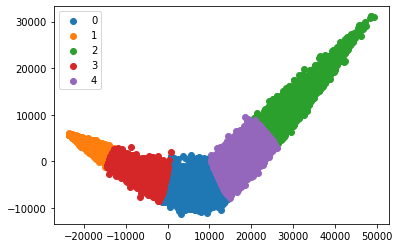

In [ ]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
sns.barplot[df]

In [ ]:
from google.colab import  drive
drive.mount('/drive')
df_kmeans.to_csv('/drive/My Drive/cluster_results.csv')

Mounted at /drive


AttributeError: ignored